In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

circles, perplexity=4 in 1.2 sec
circles, perplexity=6 in 1.3 sec
circles, perplexity=9 in 1.3 sec
circles, perplexity=14 in 1.4 sec
circles, perplexity=21 in 1.7 sec
circles, perplexity=30 in 1.8 sec
circles, perplexity=45 in 1.9 sec
circles, perplexity=66 in 2.5 sec
circles, perplexity=100 in 2 sec


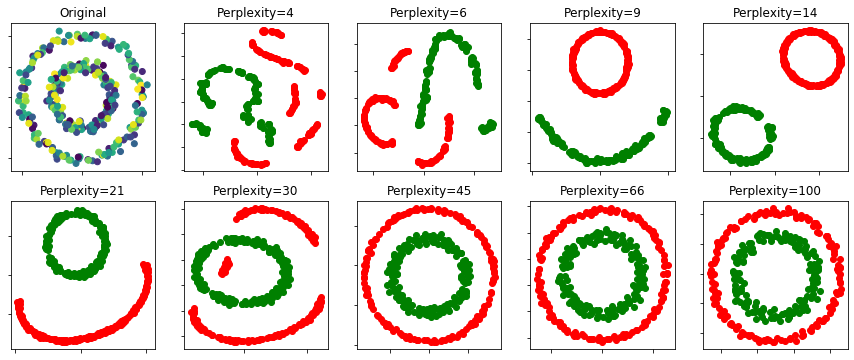

In [2]:
# set the parameters of the model and the plot
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(2, 5, figsize=(15, 6))
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

# set the data points of the S curve
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

# set data points of concentric circles
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
red = y == 0
green = y == 1

# plot the original plot
ax = subplots[0][0]
ax.set_title("Original")
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# plot t-SNE clustering plot under different perplexity
for i, perplexity in enumerate(perplexities):
    if i<4:
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    
plt.show()